# The story Behind The Data
A bank is concerned that more and more customers are leaving its credit card services. They would really appreciate if someone could analyze it for them, in order to understand the main reasons for leaving the services, and to come up with recommendations for how the bank can mitigate that. Eventually, the bank would like to proactively implement these recommendations in order to keep their customers happy.

**A full ERD can be found [here](https://dbdiagram.io/d/638cdd8abae3ed7c45449eed)**

# Data Description
In this task, few datasets are provided:

1. **`BankChurners.csv`**   - this file contains basic information about each client (10 columns). The columns are:
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account;
    - `Attrition Flag` - Internal event (customer activity) variable - if the client had churned (attrited) or not (existing).
    - `Dependent Count` - Demographic variable - Number of dependents
    - `Card_Category` - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
    - `Months_on_book` - Period of relationship with bank
    - `Months_Inactive_12_mon` - No. of months inactive in the last 12 months
    - `Contacts_Count_12_mon` - No. of Contacts in the last 12 months
    - `Credit_Limit` - Credit Limit on the Credit Card
    - `Avg_Open_To_Buy` - Open to Buy Credit Line (Average of last 12 months)
    - `Avg_Utilization_Ratio` - Average Card Utilization Ratio
2. **`basic_client_info.csv`** - this file contains some basic client info per each client (6 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Customer Age` - Demographic variable - Customer's Age in Years
    - `Gender` - Demographic variable - M=Male, F=Female
    - `Education_Level` - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.`
    - `Marital_Status` - Demographic variable - Married, Single, Divorced, Unknown
    - `Income_Category` - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
3. **`enriched_churn_data.csv`** - this file contains some enriched data about each client (7 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Total_Relationship_Count` - Total no. of products held by the customer
    - `Total_Revolving_Bal` - Total Revolving Balance on the Credit Card
    - `Total_Amt_Chng_Q4_Q1` - Change in Transaction Amount (Q4 over Q1)
    - `Total_Trans_Amt` - Total Transaction Amount (Last 12 months)
    - `Total_Trans_Ct` - Total Transaction Count (Last 12 months)
    - `Total_Ct_Chng_Q4_Q1` - Change in Transaction Count (Q4 over Q1)

# SQL tasks

1. How many clients does the bank have and are above the age of 50?
2. What’s the distribution (in %) between male and female clients?
3. Let’s define a new variable called `age_group`:
    - 10 < x ≤ 30
    - 30 < x ≤ 40
    - 40 < x ≤ 50
    - 50 < x ≤ 60
    - 60 <x ≤ 120
    
    Per each `age_group`, `marital_status` and `income_category`, find out the following values:
    
    a. Churn_rate (in %)
    
    b. Average `Total_Relationship_Count`
    
    c. Minimum value of `Total_Amt_Chng_Q4_Q1`
    
    d. Count of customers
    
    Make sure to order the data by the number of customers in a descending order***
    
4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

5. Without the usage of group by at all, find the 3rd and 4th highest client IDs (`CLIENTNUM`’s) of `Total_Amt_Chng_Q4_Q1`?

6. We’re interested in knowing which client (CLIENTNUM) has the 2nd highest `Total_Trans_Amt`, Per each `Marital_Status`. 

The bank will create a dedicated campaign and target these specific clients moving forward. In this step, help the bank find these clients.

In order to start writing and running SQL queries here in Workspace, you have a SQL type cell. New cell can be added by clicking on "Add SQL". Masterschool hosts a Postgres DB with all Capstone project datasets. To connect to MS server you need to choose relevant integration. Choose according to the dataset you explore. 

In [1]:
--1. How many clients does the bank have and are above the age of 50?

SELECT COUNT(DISTINCT bankchurners.clientnum) AS Count_of_Clients 
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
WHERE customer_age > 50

,count_of_clients
0,3078


In [2]:
--2. What’s the distribution (in %) between male and female clients?
--https://www.navicat.com/en/company/aboutus/blog/1871-calculating-percentage-of-total-rows-in-sql

SELECT Gender, 
       COUNT(gender) as Gender_Count, 
       COUNT(*) * 100.0 / SUM(COUNT(*)) OVER() AS Percent_of_Gender  
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
GROUP BY 1;

,gender,gender_count,percent_of_gender
0,M,4769,47.091932
1,F,5358,52.908068


In [3]:
--3. Let’s define a new variable called age_group:
-- 10 < x ≤ 30
-- 30 < x ≤ 40
-- 40 < x ≤ 50
-- 50 < x ≤ 60
-- 60 <x ≤ 120
-- Per each age_group, marital_status and income_category, find out the following values:
-- a. Churn_rate (in %)
-- b. Average Total_Relationship_Count
-- c. Minimum value of Total_Amt_Chng_Q4_Q1
-- d. Count of customers

--https://www.datacamp.com/workspace/templates/template-sql-categorical-variables

WITH cte_1
AS (
SELECT bankchurners.attrition_flag,
       marital_status,
       income_category,
       total_relationship_count,
       total_amt_chng_q4_q1,
CASE 
    WHEN (customer_age>10 AND customer_age<=30) THEN '10_age_30'
    WHEN (customer_age>30 AND customer_age<=40) THEN '30_age_40'
    WHEN (customer_age>40 AND customer_age<=50) THEN '40_age_50'
    WHEN (customer_age>50 AND customer_age<=60) THEN '50_age_60'
    ELSE '60_age_120' 
END AS age_group         
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
JOIN enriched_churn_data
ON bankchurners.clientnum = enriched_churn_data.clientnum
),

cte_2
AS (
SELECT age_group,
       marital_status,
       income_category,
       total_relationship_count,
       total_amt_chng_q4_q1,
CASE 
    WHEN (attrition_flag LIKE 'Existing Customer') THEN 0
    ELSE 1
END AS churn_dummy
FROM cte_1
)

SELECT age_group,
       marital_status,
       income_category,
       COUNT(*) as total_customer,
       ROUND((SUM(churn_dummy) * 100.00 /(SELECT COUNT(*) FROM basic_client_info)),4) as churn_rate,
       AVG(total_relationship_count) as avg_relationship_count,
       MIN(total_amt_chng_q4_q1) as min_amt_chng_q4_q1
       
FROM cte_2
GROUP BY 1, 2, 3
ORDER BY 1,4 DESC;

,age_group,marital_status,income_category,total_customer,churn_rate,avg_relationship_count,min_amt_chng_q4_q1
0,10_age_30,Single,Less than $40K,69,0.6813,4.115942,0.299
1,10_age_30,Married,Less than $40K,36,0.3555,3.611111,0.549
2,10_age_30,Single,$40K - $60K,29,0.2864,4.379310,0.331
3,10_age_30,Single,Unknown,27,0.2666,4.000000,0.391
4,10_age_30,Divorced,Less than $40K,16,0.1580,4.500000,0.632
...,...,...,...,...,...,...,...
111,60_age_120,Married,$120K +,2,0.0197,3.500000,0.424
112,60_age_120,Unknown,Unknown,2,0.0197,3.500000,0.628
113,60_age_120,Divorced,$40K - $60K,2,0.0197,4.500000,0.567
114,60_age_120,Unknown,$80K - $120K,2,0.0197,5.500000,0.722


In [4]:
--3. Another solution
SELECT age_group, marital_status, income_category, ROUND(100.0 * SUM(churned) / (SELECT COUNT(*) FROM basic_client_info), 4) AS churn_rate,
AVG(Total_Relationship_Count) avg_Total_Relationship_Count, MIN(Total_Amt_Chng_Q4_Q1) min_Total_Amt_Chng_Q4_Q1, COUNT(*) customers
FROM (
SELECT b.clientnum, customer_age, marital_status, income_category, b.attrition_flag, CASE WHEN b.attrition_flag = 'Attrited Customer' THEN 1 ELSE 0 END AS churned,
CASE WHEN customer_age > 10 AND customer_age <= 30 THEN '10_age_30'
WHEN customer_age > 30 AND customer_age <= 40 THEN '30_age_40'
WHEN customer_age > 40 AND customer_age <= 50 THEN '40_age_50'
WHEN customer_age > 50 AND customer_age <= 60 THEN '50_age_60'
WHEN customer_age > 60 AND customer_age <= 120 THEN '60_age_120' END AS age_group,
c.Total_Relationship_Count, c.Total_Amt_Chng_Q4_Q1
    FROM basic_client_info  a
    INNER JOIN BankChurners b ON a.CLIENTNUM = b.clientnum
    INNER JOIN enriched_churn_data c ON b.clientnum = c.CLIENTNUM
    ) as x
    GROUP BY age_group, marital_status, income_category
    ORDER BY age_group,customers DESC

,age_group,marital_status,income_category,churn_rate,avg_total_relationship_count,min_total_amt_chng_q4_q1,customers
0,10_age_30,Single,Less than $40K,0.0,4.115942,0.299,69
1,10_age_30,Married,Less than $40K,0.0,3.611111,0.549,36
2,10_age_30,Single,$40K - $60K,0.0,4.379310,0.331,29
3,10_age_30,Single,Unknown,0.0,4.000000,0.391,27
4,10_age_30,Divorced,Less than $40K,0.0,4.500000,0.632,16
...,...,...,...,...,...,...,...
111,60_age_120,Married,$120K +,0.0,3.500000,0.424,2
112,60_age_120,Unknown,Unknown,0.0,3.500000,0.628,2
113,60_age_120,Divorced,$40K - $60K,0.0,4.500000,0.567,2
114,60_age_120,Unknown,$80K - $120K,0.0,5.500000,0.722,2


In [5]:
--4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

SELECT income_category,
       COUNT(*) as clients_count,
       100.0 * COUNT(*)/SUM(COUNT(*)) OVER() as percent_of_category    
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
JOIN enriched_churn_data
ON bankchurners.clientnum = enriched_churn_data.clientnum
WHERE gender LIKE 'M' 
AND card_category LIKE 'Blue'
GROUP BY 1;


,income_category,clients_count,percent_of_category
0,$80K - $120K,1395,32.179931
1,Less than $40K,257,5.928489
2,Unknown,50,1.153403
3,$120K +,645,14.878893
4,$40K - $60K,715,16.493656
5,$60K - $80K,1273,29.365629


In [6]:
--5. Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) of Total_Amt_Chng_Q4_Q1?

SELECT clientnum,
       total_amt_chng_q4_q1
FROM enriched_churn_data
ORDER BY 2 DESC
LIMIT 2 OFFSET 2;


,clientnum,total_amt_chng_q4_q1
0,713989233,2.675
1,713982108,2.594


In [7]:
--6. We’re interested in knowing which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.

WITH cte_1 
AS (
SELECT bankchurners.clientnum,
       total_trans_amt,
       marital_status   
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
JOIN enriched_churn_data
ON bankchurners.clientnum = enriched_churn_data.clientnum
WHERE marital_status LIKE 'Married'
ORDER BY 2 DESC
LIMIT 1 OFFSET 1
),

cte_2 
AS (
SELECT bankchurners.clientnum,
       total_trans_amt,
       marital_status   
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
JOIN enriched_churn_data
ON bankchurners.clientnum = enriched_churn_data.clientnum
WHERE marital_status LIKE 'Single'
ORDER BY 2 DESC
LIMIT 1 OFFSET 1
),

cte_3
AS (
SELECT bankchurners.clientnum,
       total_trans_amt,
       marital_status   
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
JOIN enriched_churn_data
ON bankchurners.clientnum = enriched_churn_data.clientnum
WHERE marital_status LIKE 'Divorced'
ORDER BY 2 DESC
LIMIT 1 OFFSET 1
),

cte_4
AS (
SELECT bankchurners.clientnum,
       total_trans_amt,
       marital_status   
FROM bankchurners
JOIN basic_client_info
ON bankchurners.clientnum = basic_client_info.clientnum
JOIN enriched_churn_data
ON bankchurners.clientnum = enriched_churn_data.clientnum
WHERE marital_status LIKE 'Unknown'
ORDER BY 2 DESC
LIMIT 1 OFFSET 1
)

SELECT * 
FROM cte_1
UNION ALL
SELECT *
FROM cte_2
UNION ALL
SELECT *
FROM cte_3
UNION ALL
SELECT *
FROM cte_4;

,clientnum,total_trans_amt,marital_status
0,717642633,17995,Married
1,716004258,17634,Single
2,716894658,16824,Divorced
3,719848008,16098,Unknown


# Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualizations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Total number of clients
    - Churn rate %
    - Average transaction amount per customer
    - Average transaction amount before churn
    - etc.
2. **Churn rate %** among different **age groups**. You will need to:
    - Use the Bins function to split client age into age ranges
    - Define Churn rate % as a calculated field
    - Choose the way of visualizing the comparison
3. **A Scatterplot** visualizing certain customer spending behaviors and their connection to the churn if exists. For example, you can compare Total transaction amount and Total transaction count of each client and use color to mark churned and existing customers. 
4. **A Highlight Table** comparing Churn rate % among two demographic dimensions (from *basic_client_info* table), where one is placed on Rows and another on Columns, forming a matrix. 
5. **A Bar Chart** with multiple metrics by Clientnum, where each row represents one Client and has multiple metrics as columns. Add a few filters or parameters to let user drill down into the set of clients they are interested in.
6. **A Pareto Analysis** based on custom defined **customer segment**. 
    - Segment can include values from the demographic information of the client. For example,
        - Gender | Income
        - Gender | Income | Marital status
        - etc.
    - Choose the metric to analyse. For example,
        - Total number of clients (People from which customer segments most often become our clients?)
        - Churn rate absolute (How many churned customers we have in each segment?)
        - Churn rate % (What is the relative churn rate in each customer segment?)
        - etc.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the metric used in the chart(s)
    - to change the value of a benchmark
8. At least one **more visualization of your choice** adds value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._

**Please follow this** **_[link](https://public.tableau.com/views/BankChurnAnalysis_16755324415890/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)_** **to see the Tableau dashboard.** 
- On the top of the dashboard, there is a filter to choose the card type which will break down all the analysis as per the selected type of card
- We also see that there are 10127 customers, the overall churn rate is 16.1% and the average transaction per customer is about 4400
- Most of the customers are in the 40-55 age group and the churn rate is the highest for the 55-60 age group
- In terms of income and education, the churn is highest for those with less than 40K income and having a doctorate level
- Single females are more likely to churn
- As the number of products per customer increases - the churn rate decreases
- Around one-third of all the churned customers are females with income less than 40K
- For the transactions amount of which is below 6K there is a positive correlation with the transaction count
- For attrited customers, the maximum amount of transactions is below 11K, and the count of transactions is below 95

# Deep Dive Analysis

In [8]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [9]:
# Set the number of columns and row to be displayed
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [10]:
# Loading + let's see the head of each file we have
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')
bank_churners_df.head(3)

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077


In [11]:
bank_churners_df.shape

(10127, 10)

In [12]:
basic_client_info_df.head(3)

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K


In [13]:
basic_client_info_df.shape

(10127, 6)

In [14]:
enriched_churn_df.head(3)

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36


In [15]:
enriched_churn_df.shape

(10127, 7)

## Analysis questions

### What is the structure of the datasets?

> There are 10127 observations (client records) in each of the above-mentioned three datasets. The 1st dataset has 10, the 2nd dataset has 6, and the 3rd dataset has 7 variables (features) describing the client information.

### What is/are the main feature(s) of interest in the datasets?

> `Attrition Flag` will be the main variable in the analysis. The specific goal of this study is to explore what factors influence the likelihood of a customer's attention.

### What features in the datasets will help support the investigation into the feature(s) of interest?

> Customer attrition can be theoretically affected by many variables in the databases. We will explore all the variables to estimate the possible impact.

### Data Assessment
> Now that we defined the main features of interest in our dataset let's do some preliminary data wrangling to prepare the dataset for further analysis.

> From the Tableau part of the analysis, we have already identified that there are no duplicates in the three datasets. We will merge the datasets to have one dataset and facilitate the further work.

In [16]:
# Merge the datastets
df = bank_churners_df.merge(basic_client_info_df,on='clientnum').merge(enriched_churn_df,on='clientnum')
df.shape

(10127, 21)

In [17]:
# Visually assess the sample of observations from the dataset
df.sample(10)

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
5023,712967508,Existing Customer,3,Blue,36,1,2,2572.0,1479.0,0.425,47,M,Doctorate,Unknown,$60K - $80K,4,1093,0.615,5038,0.830,86
1100,717903108,Existing Customer,1,Blue,46,1,1,4283.0,3795.0,0.114,57,F,College,Single,Unknown,6,488,0.865,4689,0.477,65
2527,810856833,Existing Customer,4,Blue,40,2,2,11962.0,10937.0,0.086,45,M,College,Unknown,$120K +,3,1025,0.694,1907,0.926,52
1095,717646008,Existing Customer,1,Blue,46,2,2,5686.0,5686.0,0.000,61,F,College,Married,Unknown,6,0,1.027,4338,0.675,67
6044,711577458,Existing Customer,1,Blue,36,2,1,3244.0,1389.0,0.572,52,F,Uneducated,Single,Less than $40K,2,1855,0.700,8087,0.792,95
5479,709668408,Existing Customer,1,Blue,36,4,1,5204.0,5204.0,0.000,56,F,Graduate,Unknown,$40K - $60K,5,0,1.008,5285,0.864,82
7479,757224108,Existing Customer,4,Blue,32,3,1,2624.0,1507.0,0.426,43,F,Graduate,Married,Less than $40K,6,1117,0.826,3929,0.595,67
662,718768158,Existing Customer,1,Blue,48,1,2,3539.0,3539.0,0.000,57,M,College,Single,$40K - $60K,3,0,0.781,1336,0.211,23
8920,717711108,Existing Customer,3,Blue,27,2,2,3541.0,2499.0,0.294,43,F,Unknown,Married,Less than $40K,1,1042,0.774,14511,0.708,123
9754,712730583,Existing Customer,0,Blue,20,2,3,8592.0,7391.0,0.140,29,M,Uneducated,Married,$60K - $80K,5,1201,0.778,1842,0.852,50


In [18]:
# Double check for duplicate rows
duplicates = df.duplicated().sum()
print('There are {} duplicate observations in the dataset'.format(duplicates))

There are 0 duplicate observations in the dataset


In [19]:
# Check for the duplicated columns
duplicate_cols = df.columns[df.columns.duplicated()]
duplicate_cols

Index([], dtype='object')

In [20]:
# View the variables 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   card_category             10127 non-null  object 
 4   months_on_book            10127 non-null  int64  
 5   months_inactive_12_mon    10127 non-null  int64  
 6   contacts_count_12_mon     10127 non-null  int64  
 7   credit_limit              10127 non-null  float64
 8   avg_open_to_buy           10127 non-null  float64
 9   avg_utilization_ratio     10127 non-null  float64
 10  customer_age              10127 non-null  int64  
 11  gender                    10127 non-null  object 
 12  education_level           10127 non-null  object 
 13  marital_status            10127 non-null  object 
 14  income

## Basic statistics

In [21]:
# View the disctiptive statistics
df.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894,46.325960,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691,8.016814,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000,26.000000,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000,41.000000,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000,46.000000,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000,52.000000,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000,73.000000,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [22]:
# View unique values in object type columns
for i in df.select_dtypes(include=object).columns:
    print("Unique values in " + i+": {}".format((df[i].unique().tolist())))
    print("**"*20+'\n')

Unique values in attrition_flag: ['Existing Customer', 'Attrited Customer']
****************************************

Unique values in card_category: ['Blue', 'Silver', 'Gold', 'Platinum']
****************************************

Unique values in gender: ['M', 'F']
****************************************

Unique values in education_level: ['High School', 'Unknown', 'Doctorate', 'Graduate', 'Uneducated', 'College', 'Post-Graduate']
****************************************

Unique values in marital_status: ['Married', 'Single', 'Divorced', 'Unknown']
****************************************

Unique values in income_category: ['$40K - $60K', '$60K - $80K', 'Unknown', 'Less than $40K', '$80K - $120K', '$120K +']
****************************************



In [23]:
# View counts in all categorical type columns
categorical_list = df.select_dtypes(include=object).columns.to_list() + ['dependent_count','months_inactive_12_mon','contacts_count_12_mon','total_relationship_count'] 

for i in df[categorical_list].columns:
    print("Unique values in " + i+":\n{}".format((df[i].value_counts())))
    print("**"*20+'\n')

Unique values in attrition_flag:
Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64
****************************************

Unique values in card_category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64
****************************************

Unique values in gender:
F    5358
M    4769
Name: gender, dtype: int64
****************************************

Unique values in education_level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64
****************************************

Unique values in marital_status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64
****************************************

Unique values in income_category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$

#### Assessment Summary
Based on the visual and programmatic evaluations, the following steps need to be taken:

1. `clientnum` variable type should be changed to object.
2. `education_level`, `marital_status` and `income_category` columns contains missing data as **Unknown** category.
3. `education_level` and `income_category` variables should be converted to ordinal categorical ones.
4. Create new dummy variable with 0-1 vakues for the churn analysis

### Data Cleaning
> Now we will creat a copy of the original dataframe and address the points identified in data cleaning assessment stage

>The data cleaning mentioned below is not final and may still be required check for outliers, which we will carry out at later stages if needed.

In [24]:
# Creating a copy of the original dataframe
df_clean = df.copy()

In [25]:
# Drop the rows with 'Unknown' value
df_clean=df_clean.loc[~((df_clean.education_level.isin(['Unknown']))|(df_clean.marital_status.isin(['Unknown']))|(df_clean.income_category.isin(['Unknown'])))]
# Check the code
print(df_clean.education_level.value_counts())
print(df_clean.marital_status.value_counts())
print(df_clean.income_category.value_counts())
print(df_clean.shape)

Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: education_level, dtype: int64
Married     3564
Single      2948
Divorced     569
Name: marital_status, dtype: int64
Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: income_category, dtype: int64
(7081, 21)


In [26]:
# Store the correct variable orders in a dictionary
order_dict = {'education_level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
              'income_category': ['Less than $40K', '$40K - $60K', '$60K - $80K', 
                              '$80K - $120K', '$120K +'],
             'card_category':['Blue','Silver', 'Gold', 'Platinum']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df_clean[key] = df_clean[key].astype(correct_order)

# Check the resluts
df_clean[order_dict.keys()].dtypes

education_level    category
income_category    category
card_category      category
dtype: object

In [27]:
# Convert clientnum variable to object.
df_clean['clientnum'] = df_clean.clientnum.astype('object')

# Check the resluts
df_clean['clientnum'].dtypes

dtype('O')

In [28]:
# Create new dummy variable for the churn rate calculation
df_clean['churn']=df_clean.attrition_flag.replace({'Existing Customer':0,'Attrited Customer':1})

## Distribution Analysis for each of the columns in the dataset and Outliers Detection

### attrition_flag
#### `Question` 
-  How is the `attrition_flag` distributed?

In [29]:
# View the categories of the variable
df_clean.attrition_flag.value_counts()

Existing Customer    5968
Attrited Customer    1113
Name: attrition_flag, dtype: int64

#### `Visualization` 
- We will use a pie chart to see the proportions of each category of the `attrition_flag` variable as we don't have many (only two) categories.

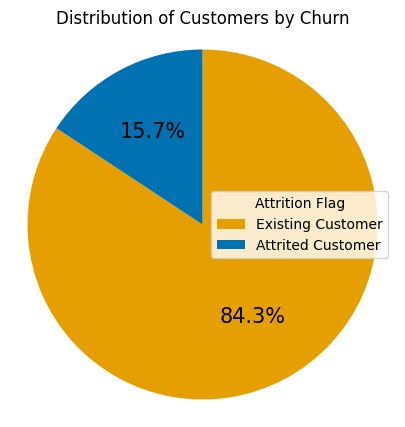

In [30]:
colors_p = {'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'}

sorted_term = pd.DataFrame(df_clean['attrition_flag'].value_counts().reset_index())
labels = sorted_term['index']
textprops = {"fontsize":15}

plt.figure(figsize=[10, 5])
plt.pie(data=sorted_term, x='attrition_flag', labels=None, startangle=90,
        counterclock=False, autopct='%.1f%%', textprops=textprops,
        colors=[colors_p[x] for x in sorted_term['index']])
plt.axis('square')
plt.title('Distribution of Customers by Churn')
plt.legend(labels, title='Attrition Flag', loc=5)
plt.show()

#### `Observations`
- Churn rate is around 16%.

### dependent_count
#### `Question` 
-  How is the `dependent_count` distributed?

In [31]:
# View the categories of the variable
df_clean.dependent_count.value_counts()

3    1929
2    1880
1    1274
4    1077
0     636
5     285
Name: dependent_count, dtype: int64

#### `Visualization` 
- We will use a bar chart to plot the Number of dependents as the number of unique values not to high. Boxplot will be used to check the outliers.

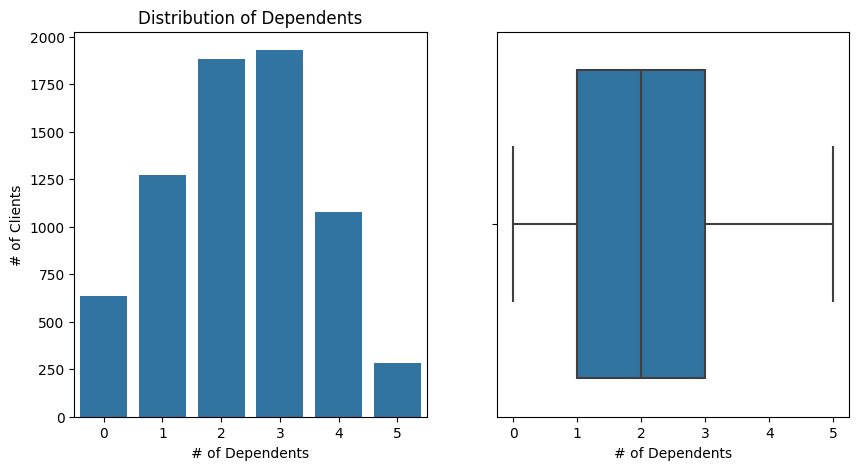

In [32]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])

# subplot 1
plt.subplot(1,2,1)
sb.countplot(data = df_clean, x = 'dependent_count', color = base_color)
plt.xlabel('# of Dependents')
plt.ylabel('# of Clients')
plt.title('Distribution of Dependents');

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='dependent_count')
plt.xlabel('# of Dependents');

#### `Observations`
- Most of the clients have two or three dependents.
- No outliers identified.

### card_category
#### `Question` 
-  How is the `card_category` distributed?

In [33]:
# View the categories of the variable
df_clean.card_category.value_counts()

Blue        6598
Silver       391
Gold          81
Platinum      11
Name: card_category, dtype: int64

#### `Visualization` 
- We will use a bar chart with sequential color scheme to plot the `card_category` categorical variable. 

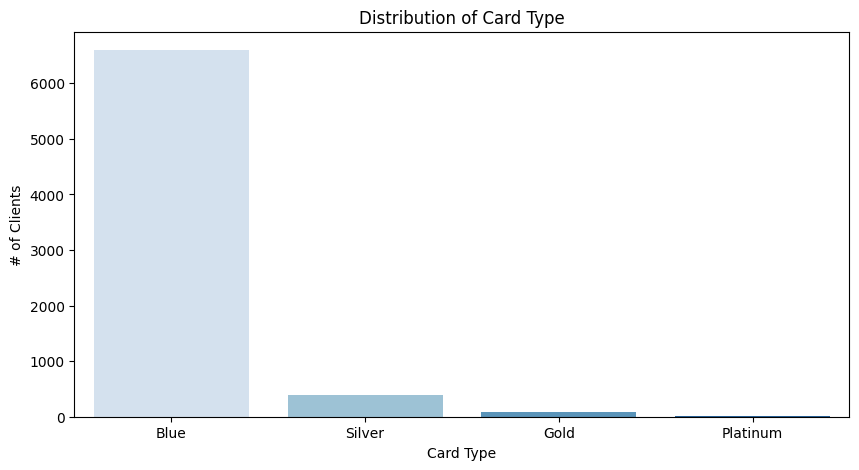

In [34]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_clean, x = 'card_category', palette = "Blues")
plt.xlabel('Card Type')
plt.ylabel('# of Clients')
plt.title('Distribution of Card Type');

#### `Observations`
- Most of the clients are the owner of blue cards.

### months_on_book
#### `Question` 
-  How is the `months_on_book` distributed?

In [35]:
# View the descriptive statistics of the variable
df_clean.months_on_book.describe()

count    7081.000000
mean       35.981359
std         8.002609
min        13.000000
25%        31.000000
50%        36.000000
75%        40.000000
max        56.000000
Name: months_on_book, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `months_on_book` numeric variable and boxplot for checking the outliers.

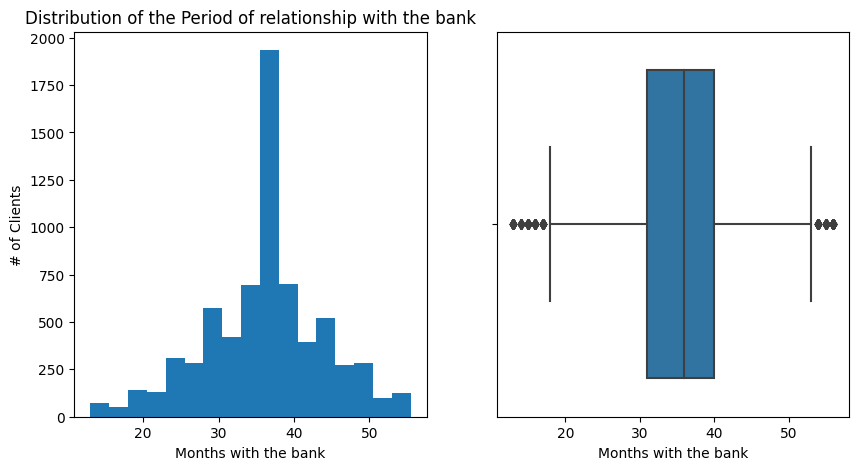

In [36]:
# Plot the distribution of the variable 
rate_bins = np.arange(df_clean.months_on_book.min(), df_clean.months_on_book.max()+0.5, 2.5)

plt.figure(figsize = [10, 5])
# subplot 1
plt.subplot(1,2,1)
plt.hist(data=df_clean, x='months_on_book', bins=rate_bins)
plt.xlabel('Months with the bank');
plt.ylabel('# of Clients')
plt.title("Distribution of the Period of relationship with the bank");

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='months_on_book')
plt.xlabel('Months with the bank');

#### `Observations`
- Most customers have a relationship of 35 months with the bank.
- It seems both the high and the low outliers to be valid points.

### months_inactive_12_mon
#### `Question` 
-  How is the `months_inactive_12_mon` distributed?

In [37]:
# View the categories of the variable
df_clean.months_inactive_12_mon.value_counts()

3    2724
2    2320
1    1525
4     289
5     129
6      75
0      19
Name: months_inactive_12_mon, dtype: int64

#### `Visualization` 
- We will use a bar chart to plot the No. of months inactive in the last 12 months as the number of unique values not to high. Boxplot will be used to check the outliers.

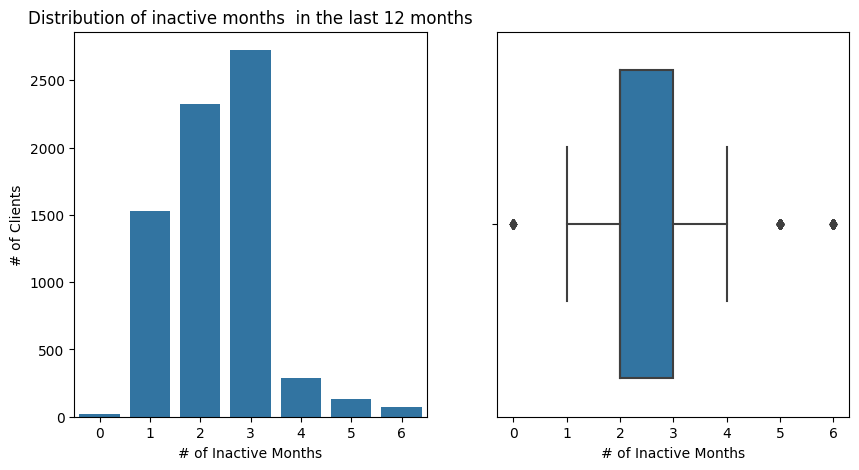

In [38]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])

# subplot 1
plt.subplot(1,2,1)
sb.countplot(data = df_clean, x = 'months_inactive_12_mon', color = base_color)
plt.xlabel('# of Inactive Months')
plt.ylabel('# of Clients')
plt.title('Distribution of inactive months  in the last 12 months');

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='months_inactive_12_mon')
plt.xlabel('# of Inactive Months');

#### `Observations`
- Most of the customers were inactive for 1-3 months in the last 12 months.
- It seems both the high and the low outliers to be valid points.

### contacts_count_12_mon
#### `Question` 
-  How is the `contacts_count_12_mon` distributed?

In [39]:
# View the categories of the variable
df_clean.contacts_count_12_mon.value_counts()

3    2354
2    2271
1    1029
4     978
0     288
5     131
6      30
Name: contacts_count_12_mon, dtype: int64

#### `Visualization` 
- We will use a bar chart to plot the No. of Contacts in the last 12 months as the number of unique values not to high. Boxplot will be used to check the outliers.

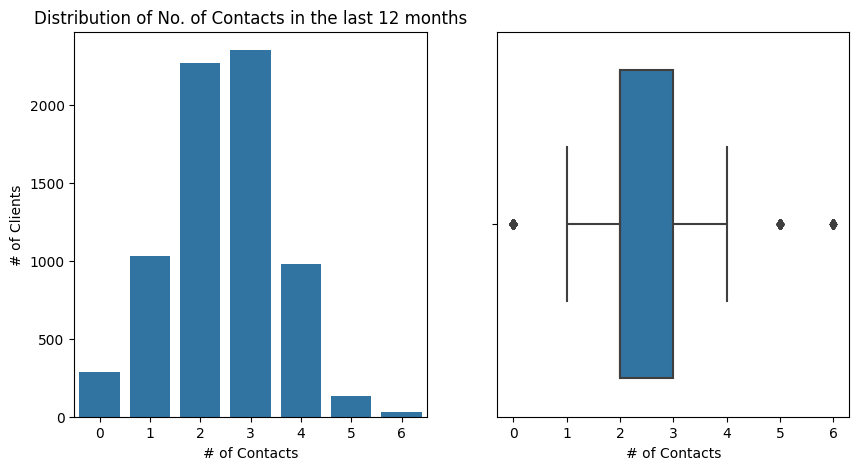

In [40]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])

# subplot 1
plt.subplot(1,2,1)
sb.countplot(data = df_clean, x = 'contacts_count_12_mon', color = base_color)
plt.xlabel('# of Contacts')
plt.ylabel('# of Clients')
plt.title('Distribution of No. of Contacts in the last 12 months');

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='contacts_count_12_mon')
plt.xlabel('# of Contacts');

#### `Observations`
- Most customers have a 2 or 3 contacts with the bank.
- It seems both the high and the low outliers to be valid points.

### credit_limit
#### `Question` 
-  How is the `credit_limit` distributed?

In [41]:
# View the descriptive statistics of the variable
df_clean.credit_limit.describe()

count     7081.000000
mean      8492.773831
std       9126.072520
min       1438.300000
25%       2498.000000
50%       4287.000000
75%      10729.000000
max      34516.000000
Name: credit_limit, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `credit_limit` numeric variable and boxplot for checking the outliers.

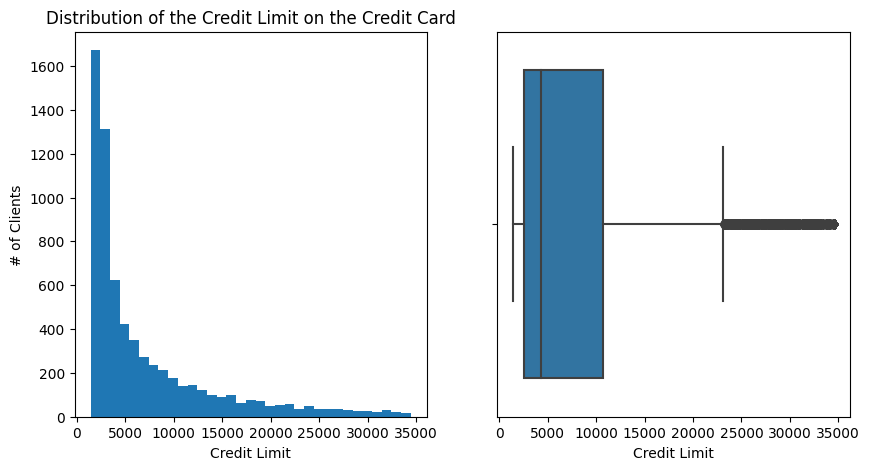

In [42]:
# Plot the distribution of the variable 
rate_bins = np.arange(df_clean.credit_limit.min(), df_clean.credit_limit.max()+0.5, 1000)

plt.figure(figsize = [10, 5])
# subplot 1
plt.subplot(1,2,1)
plt.hist(data=df_clean, x='credit_limit', bins=rate_bins)
plt.xlabel('Credit Limit');
plt.ylabel('# of Clients')
plt.title("Distribution of the Credit Limit on the Credit Card");

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='credit_limit')
plt.xlabel('Credit Limit');

#### `Observations`
- Most of the credits are in the 2500-10500 interval.
- The distribution is right skewed meaning the appearance of large observations is low.
- It seems both the high and the low outliers are valid points.

### avg_open_to_buy
#### `Question` 
-  How is the `avg_open_to_buy` (difference between the credit limit assigned to a cardholder account and the present balance on the account) distributed?

In [43]:
# View the descriptive statistics of the variable
df_clean.avg_open_to_buy.describe()

count     7081.000000
mean      7325.272207
std       9131.217585
min          3.000000
25%       1248.000000
50%       3250.000000
75%       9491.000000
max      34516.000000
Name: avg_open_to_buy, dtype: float64

#### `Visualization` 
- We will use a histogram to plot the distribution of the `avg_open_to_buy` numeric variable and boxplot for checking the outliers.

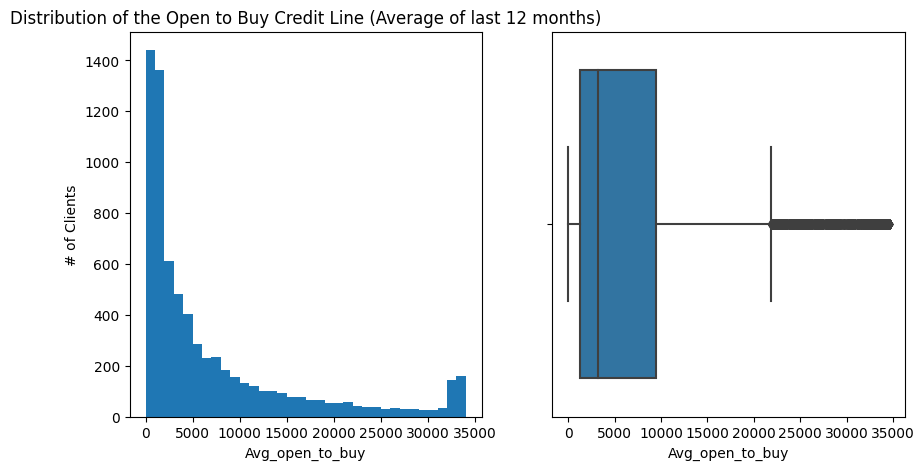

In [44]:
# Plot the distribution of the variable 
rate_bins = np.arange(df_clean.avg_open_to_buy.min(), df_clean.avg_open_to_buy.max()+0.5, 1000)

plt.figure(figsize = [10, 5])
# subplot 1
plt.subplot(1,2,1)
plt.hist(data=df_clean, x='avg_open_to_buy', bins=rate_bins)
plt.xlabel('Avg_open_to_buy');
plt.ylabel('# of Clients')
plt.title("Distribution of the Open to Buy Credit Line (Average of last 12 months)");

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='avg_open_to_buy')
plt.xlabel('Avg_open_to_buy');

#### `Observations`
- Most of the values are in the 1200-9500 interval.
- The distribution is right skewed meaning the appearance of large observations is low.
- It seems both the high and the low outliers are valid points.

### avg_utilization_ratio
#### `Question` 
-  How is the `avg_utilization_ratio` (the sum of all balances, divided by the sum of the cards' credit limits) distributed?

In [45]:
# View the descriptive statistics of the variable
df_clean.avg_utilization_ratio.describe()

count    7081.000000
mean        0.282313
std         0.278731
min         0.000000
25%         0.026000
50%         0.186000
75%         0.515000
max         0.999000
Name: avg_utilization_ratio, dtype: float64


#### `Visualization` 
- We will use a histogram to plot the distribution of the `avg_utilization_ratio` numeric variable and boxplot for checking the outliers.

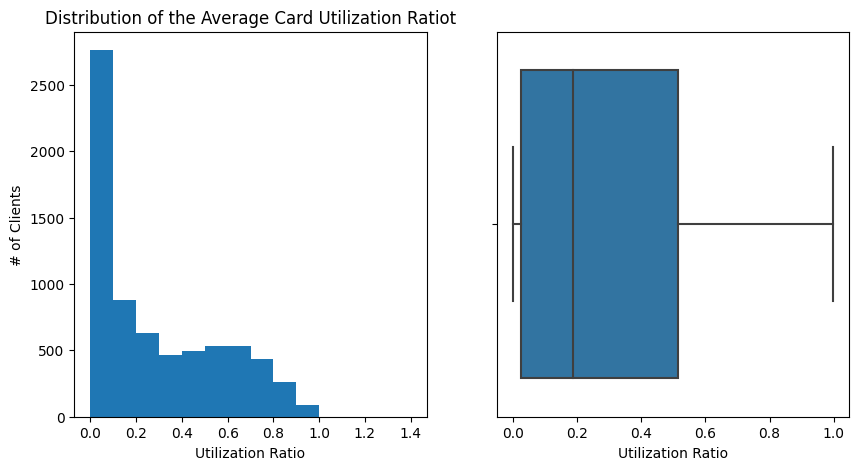

In [46]:
# Plot the distribution of the variable 
rate_bins = np.arange(df_clean.avg_utilization_ratio.min(), df_clean.avg_utilization_ratio.max()+0.5, 0.1)

plt.figure(figsize = [10, 5])
# subplot 1
plt.subplot(1,2,1)
plt.hist(data=df_clean, x='avg_utilization_ratio', bins=rate_bins)
plt.xlabel('Utilization Ratio');
plt.ylabel('# of Clients')
plt.title("Distribution of the Average Card Utilization Ratiot");

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='avg_utilization_ratio')
plt.xlabel('Utilization Ratio');

#### `Observations`
- Most of the customers have a utilization rate of less the 10%
- No outliers identified.

### customer_age
#### `Question` 
-  How is the `customer_age` distributed?

In [47]:
# View the descriptive statistics of the variable
df_clean.customer_age.describe()

count    7081.000000
mean       46.347691
std         8.041225
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: customer_age, dtype: float64


#### `Visualization` 
- We will use a histogram to plot the distribution of the `customer_age` numeric variable and boxplot for checking the outliers.

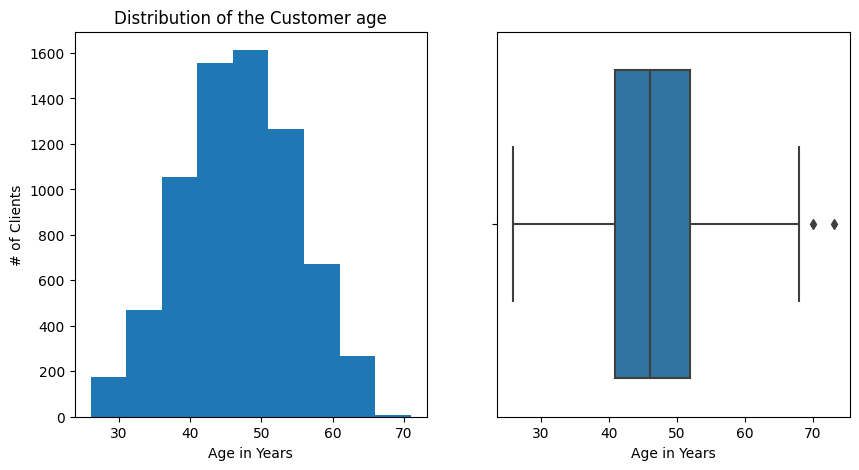

In [48]:
# Plot the distribution of the variable 
rate_bins = np.arange(df_clean.customer_age.min(), df_clean.customer_age.max()+0.5, 5)

plt.figure(figsize = [10, 5])
# subplot 1
plt.subplot(1,2,1)
plt.hist(data=df_clean, x='customer_age', bins=rate_bins)
plt.xlabel('Age in Years');
plt.ylabel('# of Clients')
plt.title("Distribution of the Customer age");

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='customer_age')
plt.xlabel('Age in Years');

#### `Observations`
- Most of the customers have 40-50 age. 
- It seems all the outliers are valid points.

### gender
#### `Question` 
-  How is the `gender` distributed?

In [49]:
# View the categories of the variable
df_clean.gender.value_counts()

M    3706
F    3375
Name: gender, dtype: int64

#### `Visualization` 
- We will use a pie chart to see the proportions of each category of the `gender` variable as we have only two categories.

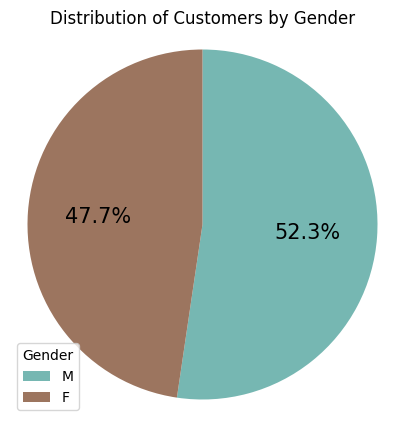

In [50]:
# Print the proportion below the bars 
colors_g = {'M': '#76B7B2', 'F': '#9C755F'}

sorted_term = pd.DataFrame(df_clean['gender'].value_counts().reset_index())
labels = sorted_term['index']
textprops = {"fontsize":15}

plt.figure(figsize=[10, 5])
plt.pie(data=sorted_term, x='gender', labels=None, startangle=90,
        counterclock=False, autopct='%.1f%%', textprops=textprops,
        colors=[colors_g[x] for x in sorted_term['index']])
plt.axis('square')
plt.title('Distribution of Customers by Gender')
plt.legend(labels, title='Gender', loc=3)
plt.show()

#### `Observations`
- 52.3% of customers are male, and the 47.7% - are female.

### education_level, marital_status, income_category 
#### `Question` 
-  How are the `education_level, marital_status, income_category` distributed?

In [51]:
# View the categories of the variables
cat_list = ['education_level','marital_status','income_category'] 

for i in df_clean[cat_list].columns:
    print("Unique values in " + i+":\n{}".format((df_clean[i].value_counts())))
    print("**"*20+'\n')

Unique values in education_level:
Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: education_level, dtype: int64
****************************************

Unique values in marital_status:
Married     3564
Single      2948
Divorced     569
Name: marital_status, dtype: int64
****************************************

Unique values in income_category:
Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: income_category, dtype: int64
****************************************



#### `Visualization` 
- We will use bar charts to plot each of the above-mentioned categorical variables.

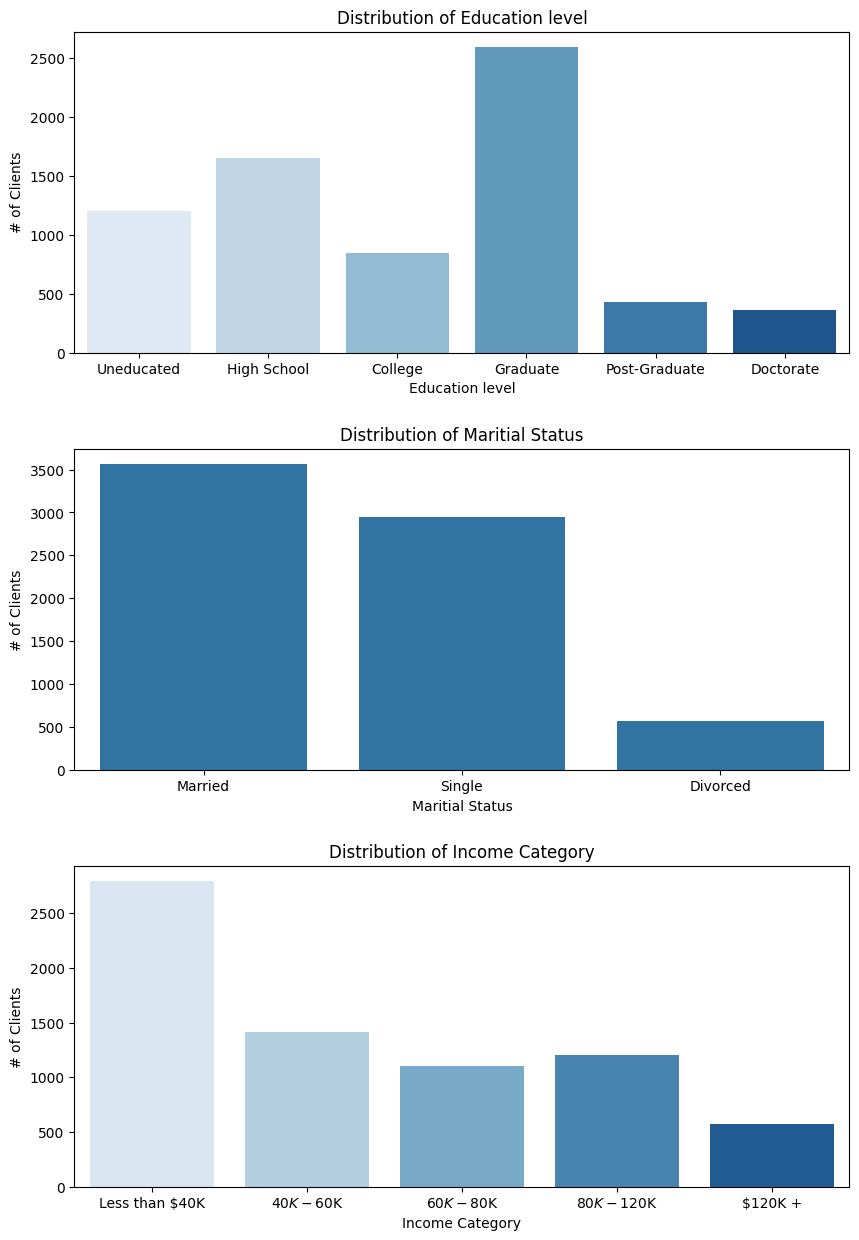

In [52]:
plt.figure(figsize = [10, 15])
# subplot 1
plt.subplot(3,1,1)
sb.countplot(data = df_clean, x = 'education_level', palette = "Blues")
plt.xlabel('Education level')
plt.ylabel('# of Clients')
plt.title('Distribution of Education level');

# subplot 1
plt.subplot(3,1,2)
default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'marital_status', color = default_color)
plt.xlabel('Maritial Status')
plt.ylabel('# of Clients')
plt.title('Distribution of Maritial Status');

# subplot 1
plt.subplot(3,1,3)
sb.countplot(data = df_clean, x = 'income_category', palette = "Blues")
plt.xlabel('Income Category')
plt.ylabel('# of Clients')
plt.title('Distribution of Income Category');

plt.subplots_adjust(hspace=0.3)

#### `Observations`
- Most of customers have graduate and high school level of education.
- `Married` is the highest category among customers maritial status.
- The highest category of income includes customers with less than 40K.

### total_relationship_count
#### `Question` 
-  How is the `total_relationship_count` distributed?

In [53]:
# View the categories of the variable
df_clean.total_relationship_count.value_counts()

3    1617
5    1363
4    1350
6    1276
2     848
1     627
Name: total_relationship_count, dtype: int64

#### `Visualization` 
- We will use a bar chart to plot the Total no. of products held by the customer as the number of unique values not to high. Boxplot will be used to check the outliers.

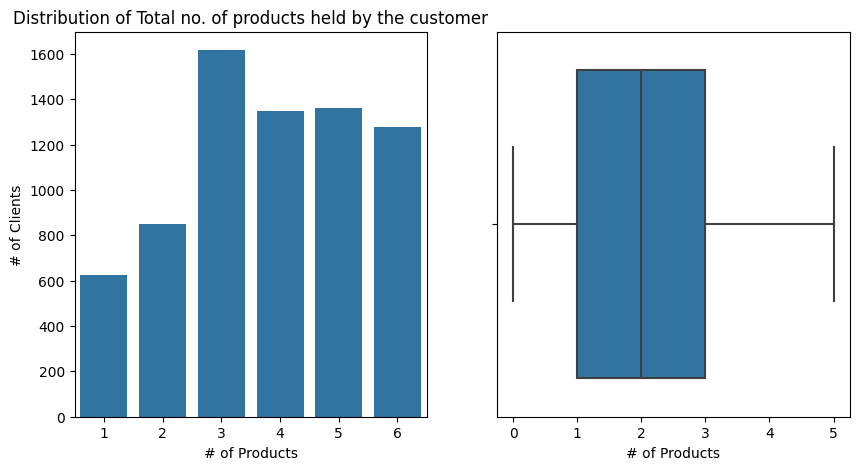

In [54]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])

# subplot 1
plt.subplot(1,2,1)
sb.countplot(data = df_clean, x = 'total_relationship_count', color = base_color)
plt.xlabel('# of Products')
plt.ylabel('# of Clients')
plt.title('Distribution of Total no. of products held by the customer');

# subplot 2
plt.subplot(1,2,2)
sb.boxplot(data=df_clean, x='dependent_count')
plt.xlabel('# of Products');

#### `Observations`
- Most of the clients have three Products.
- No outliers identified.

### 'total_revolving_bal','total_amt_chng_q4_q1','total_trans_amt','total_ct_chng_q4_q1','total_trans_ct'
#### `Question` 
-  How are the remaining numerical variables distributed?

In [55]:
# View the summary statistics of remaining numerical variables
numeric_vars=['total_revolving_bal','total_amt_chng_q4_q1','total_trans_amt','total_ct_chng_q4_q1','total_trans_ct']
df_clean[numeric_vars].describe()

,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,1167.501624,0.760584,4394.299816,0.711508,64.503319
std,812.315606,0.223139,3468.461606,0.238693,23.809330
min,0.000000,0.000000,510.000000,0.000000,10.000000
25%,463.000000,0.629000,2089.000000,0.583000,44.000000
50%,1282.000000,0.735000,3831.000000,0.700000,67.000000
75%,1781.000000,0.858000,4740.000000,0.818000,80.000000
max,2517.000000,3.397000,17995.000000,3.714000,134.000000


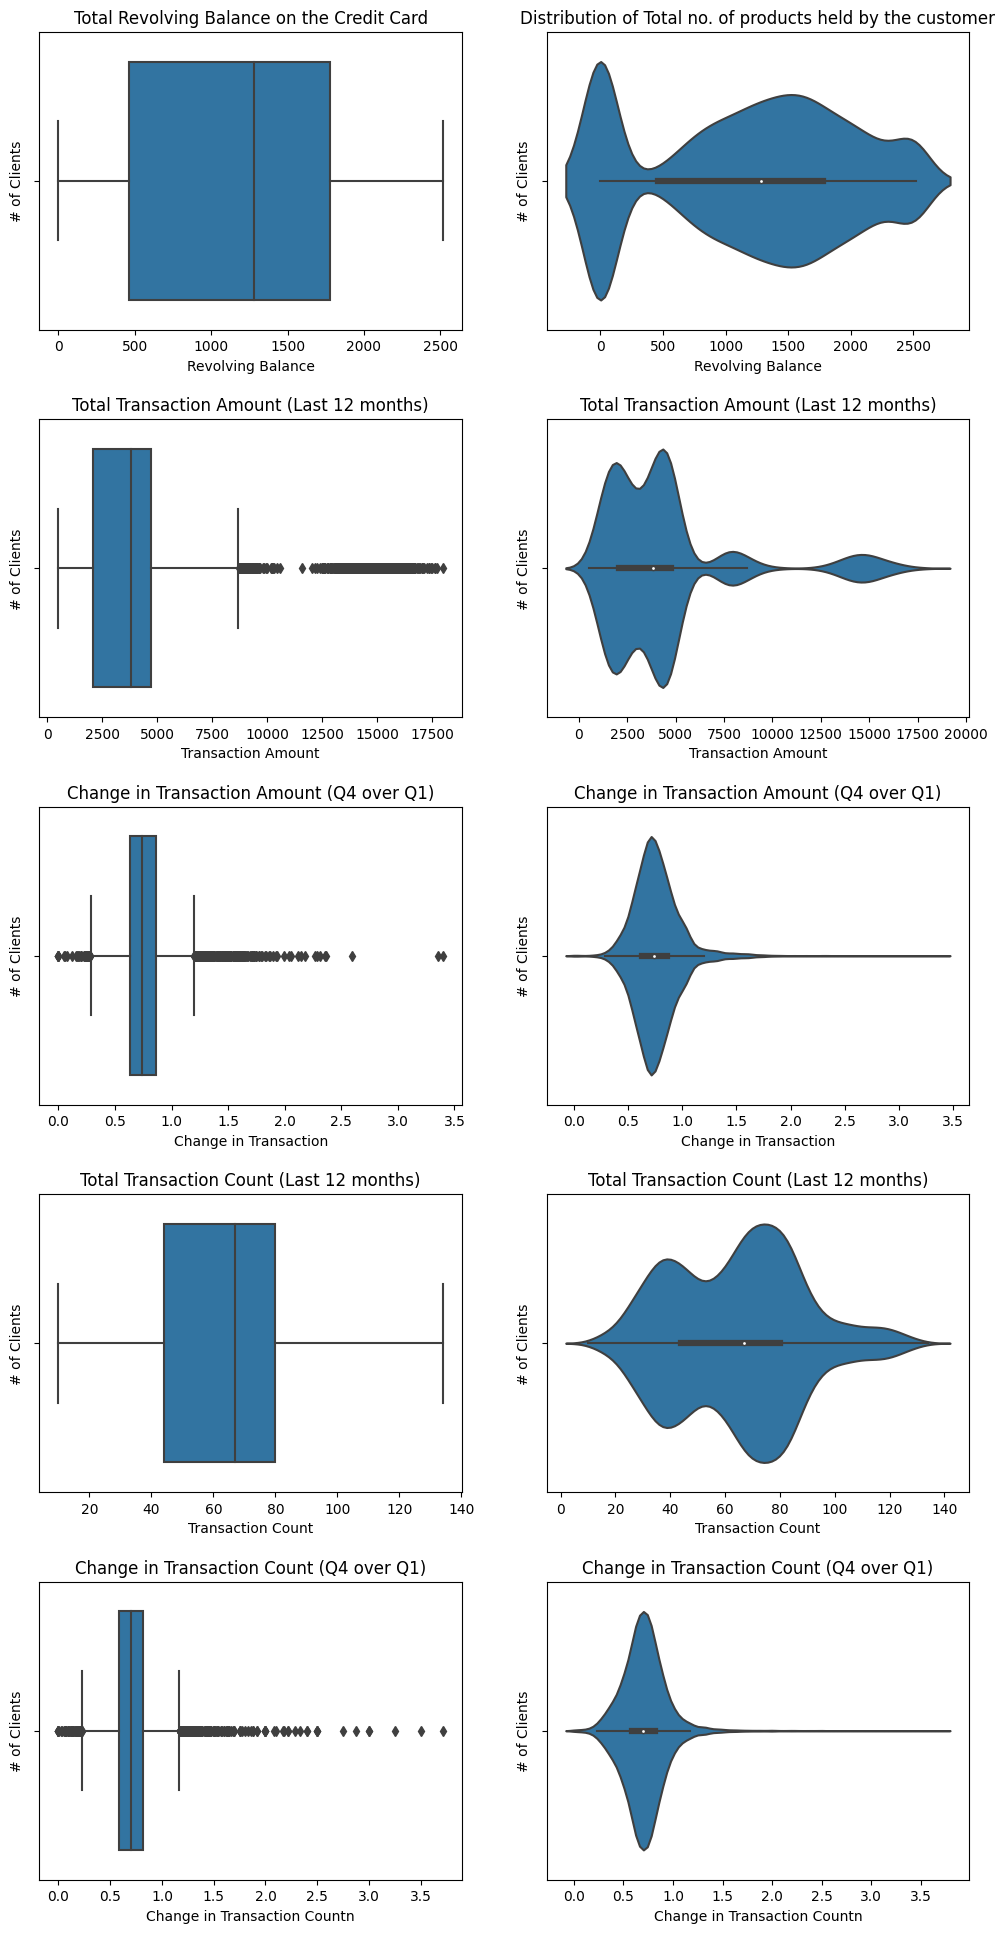

In [56]:
# Plot the boxplot of the remaining numerical variables to check the outliers
plt.figure(figsize = [12, 24])

# subplot 1
# With revolving credit, a consumer has a line of credit they can keep using and repaying over and over. The balance that carries over from one month to the next is the revolving balance on that loan

plt.subplot(5,2,1)
sb.boxplot(data=df_clean, x='total_revolving_bal')
plt.xlabel('Revolving Balance')
plt.ylabel('# of Clients')
plt.title('Total Revolving Balance on the Credit Card');

plt.subplot(5,2,2)
sb.violinplot(data=df_clean, x='total_revolving_bal')
plt.xlabel('Revolving Balance')
plt.ylabel('# of Clients')
plt.title('Distribution of Total no. of products held by the customer');

# subplot 2
plt.subplot(5,2,3)
sb.boxplot(data=df_clean, x='total_trans_amt')
plt.xlabel('Transaction Amount')
plt.ylabel('# of Clients')
plt.title('Total Transaction Amount (Last 12 months)');

plt.subplot(5,2,4)
sb.violinplot(data=df_clean, x='total_trans_amt')
plt.xlabel('Transaction Amount')
plt.ylabel('# of Clients')
plt.title('Total Transaction Amount (Last 12 months)');

# subplot 3
plt.subplot(5,2,5)
sb.boxplot(data=df_clean, x='total_amt_chng_q4_q1')
plt.xlabel('Change in Transaction')
plt.ylabel('# of Clients')
plt.title('Change in Transaction Amount (Q4 over Q1)');

plt.subplot(5,2,6)
sb.violinplot(data=df_clean, x='total_amt_chng_q4_q1')
plt.xlabel('Change in Transaction')
plt.ylabel('# of Clients')
plt.title('Change in Transaction Amount (Q4 over Q1)');

# subplot 4
plt.subplot(5,2,7)
sb.boxplot(data=df_clean, x='total_trans_ct')
plt.xlabel('Transaction Count')
plt.ylabel('# of Clients')
plt.title('Total Transaction Count (Last 12 months)');

plt.subplot(5,2,8)
sb.violinplot(data=df_clean, x='total_trans_ct')
plt.xlabel('Transaction Count')
plt.ylabel('# of Clients')
plt.title('Total Transaction Count (Last 12 months)');

# subplot 5
plt.subplot(5,2,9)
sb.boxplot(data=df_clean, x='total_ct_chng_q4_q1')
plt.xlabel('Change in Transaction Countn')
plt.ylabel('# of Clients')
plt.title('Change in Transaction Count (Q4 over Q1)');

plt.subplot(5,2,10)
sb.violinplot(data=df_clean, x='total_ct_chng_q4_q1')
plt.xlabel('Change in Transaction Countn')
plt.ylabel('# of Clients')
plt.title('Change in Transaction Count (Q4 over Q1)');

plt.subplots_adjust(hspace=0.3)

#### `Observations`
- It seems all the outliers are valid points.
- The distribution of some variables have a pattern of bimodality, which means that we can deepen the analysis and identify relevant customer segments

## Cross-Correlation Analysis

#### `Question` 
- Are there any correlated numeric variables?
#### `Visualization`

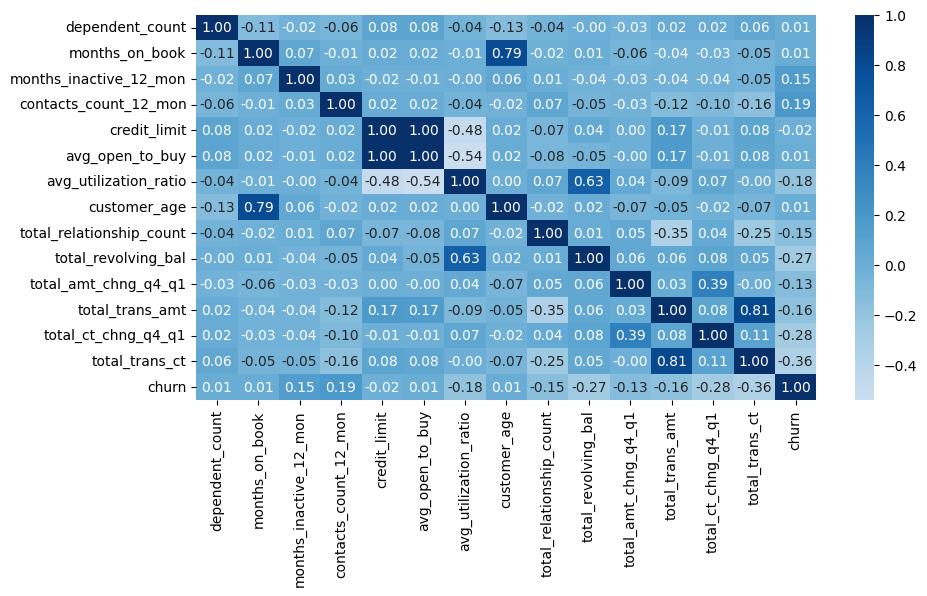

In [57]:
num_var = df_clean.select_dtypes(include=[int,float]).columns.tolist()
plt.figure(figsize = [10, 5])
sb.heatmap(df_clean[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'Blues', center = 0)
plt.xticks(rotation = 90);

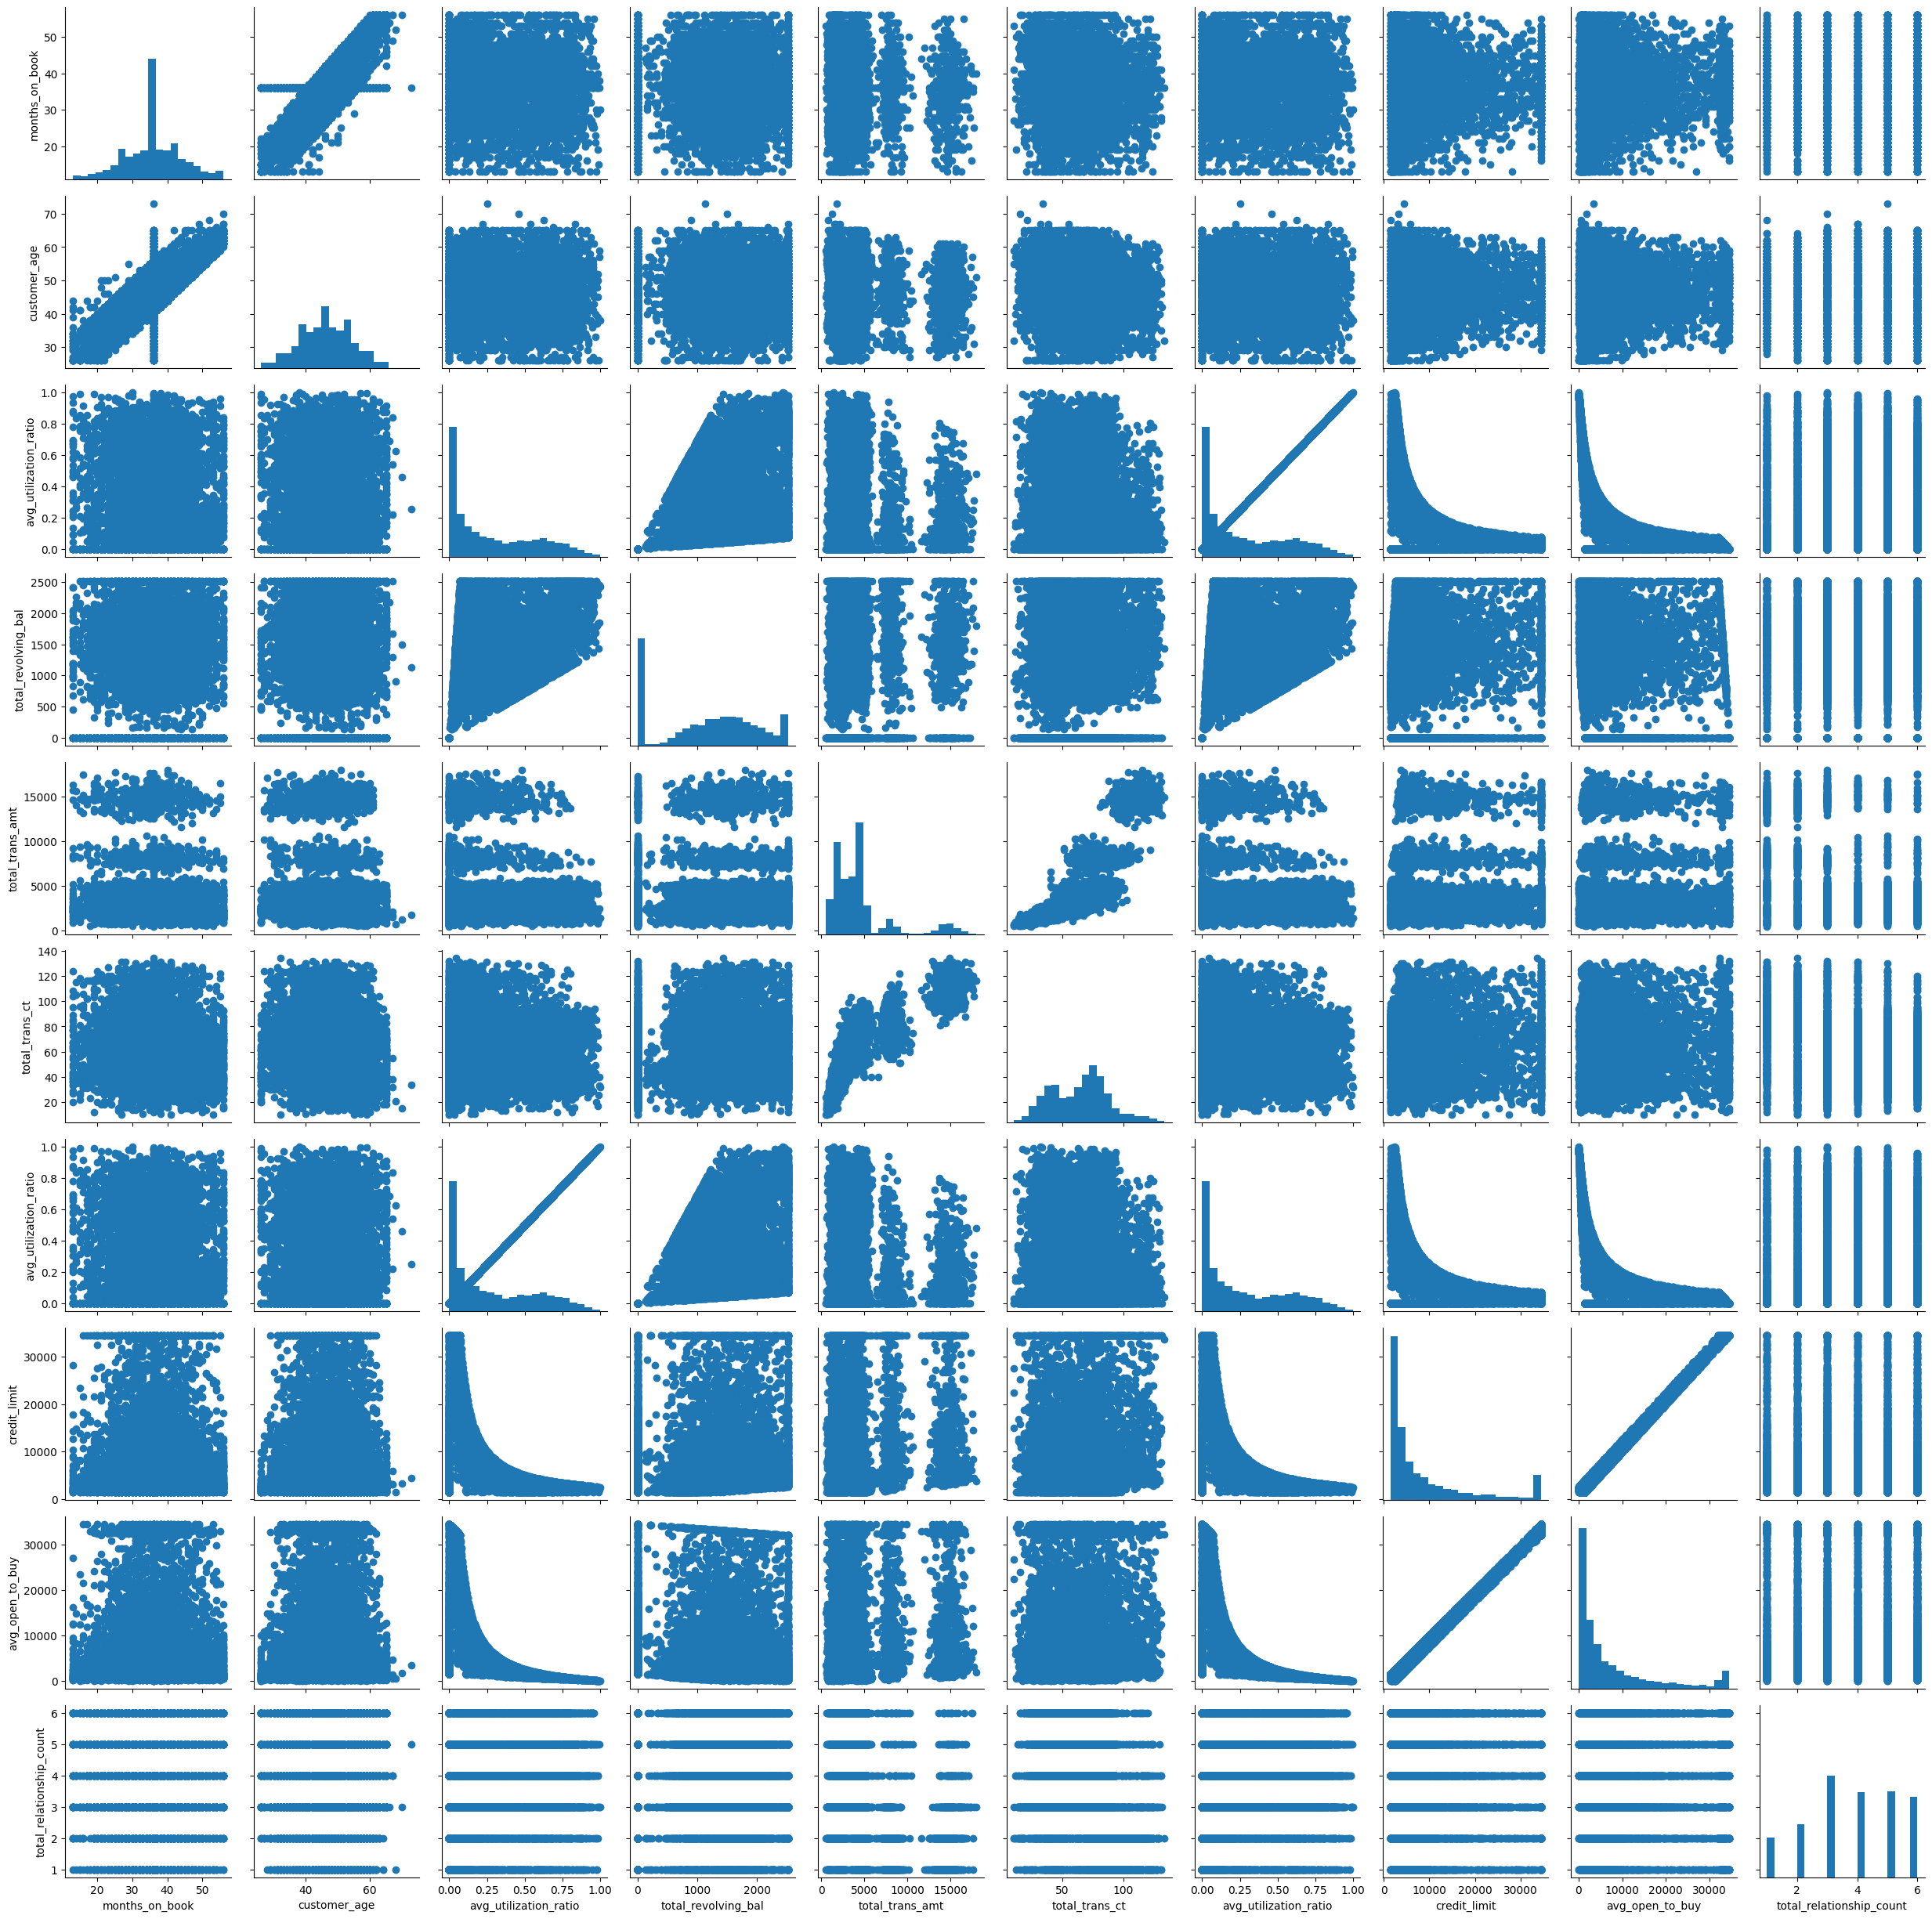

In [58]:
# plot matrix of remaining numerical variables
numeric_vars = ['months_on_book','customer_age','avg_utilization_ratio','total_revolving_bal','total_trans_amt','total_trans_ct','avg_utilization_ratio','credit_limit','avg_open_to_buy','total_relationship_count']
g = sb.PairGrid(data = df_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

#### `Observations`
- Positive correaltion can be seen between 
  1. 'months_on_book' and 'customer_age'
  2. 'avg_utilization_ratio' and 'total_revolving_bal'
  3. 'total_trans_amt' and 'total_trans_ct'
  
- Negative correlation observed between 
  1. 'credit_limit' and 'avg_utilization_ratio'
  2. 'avg_utilization_ratio' and 'avg_open_to_buy'
  3. 'total_relationship_count' and 'total_trans_amt'      

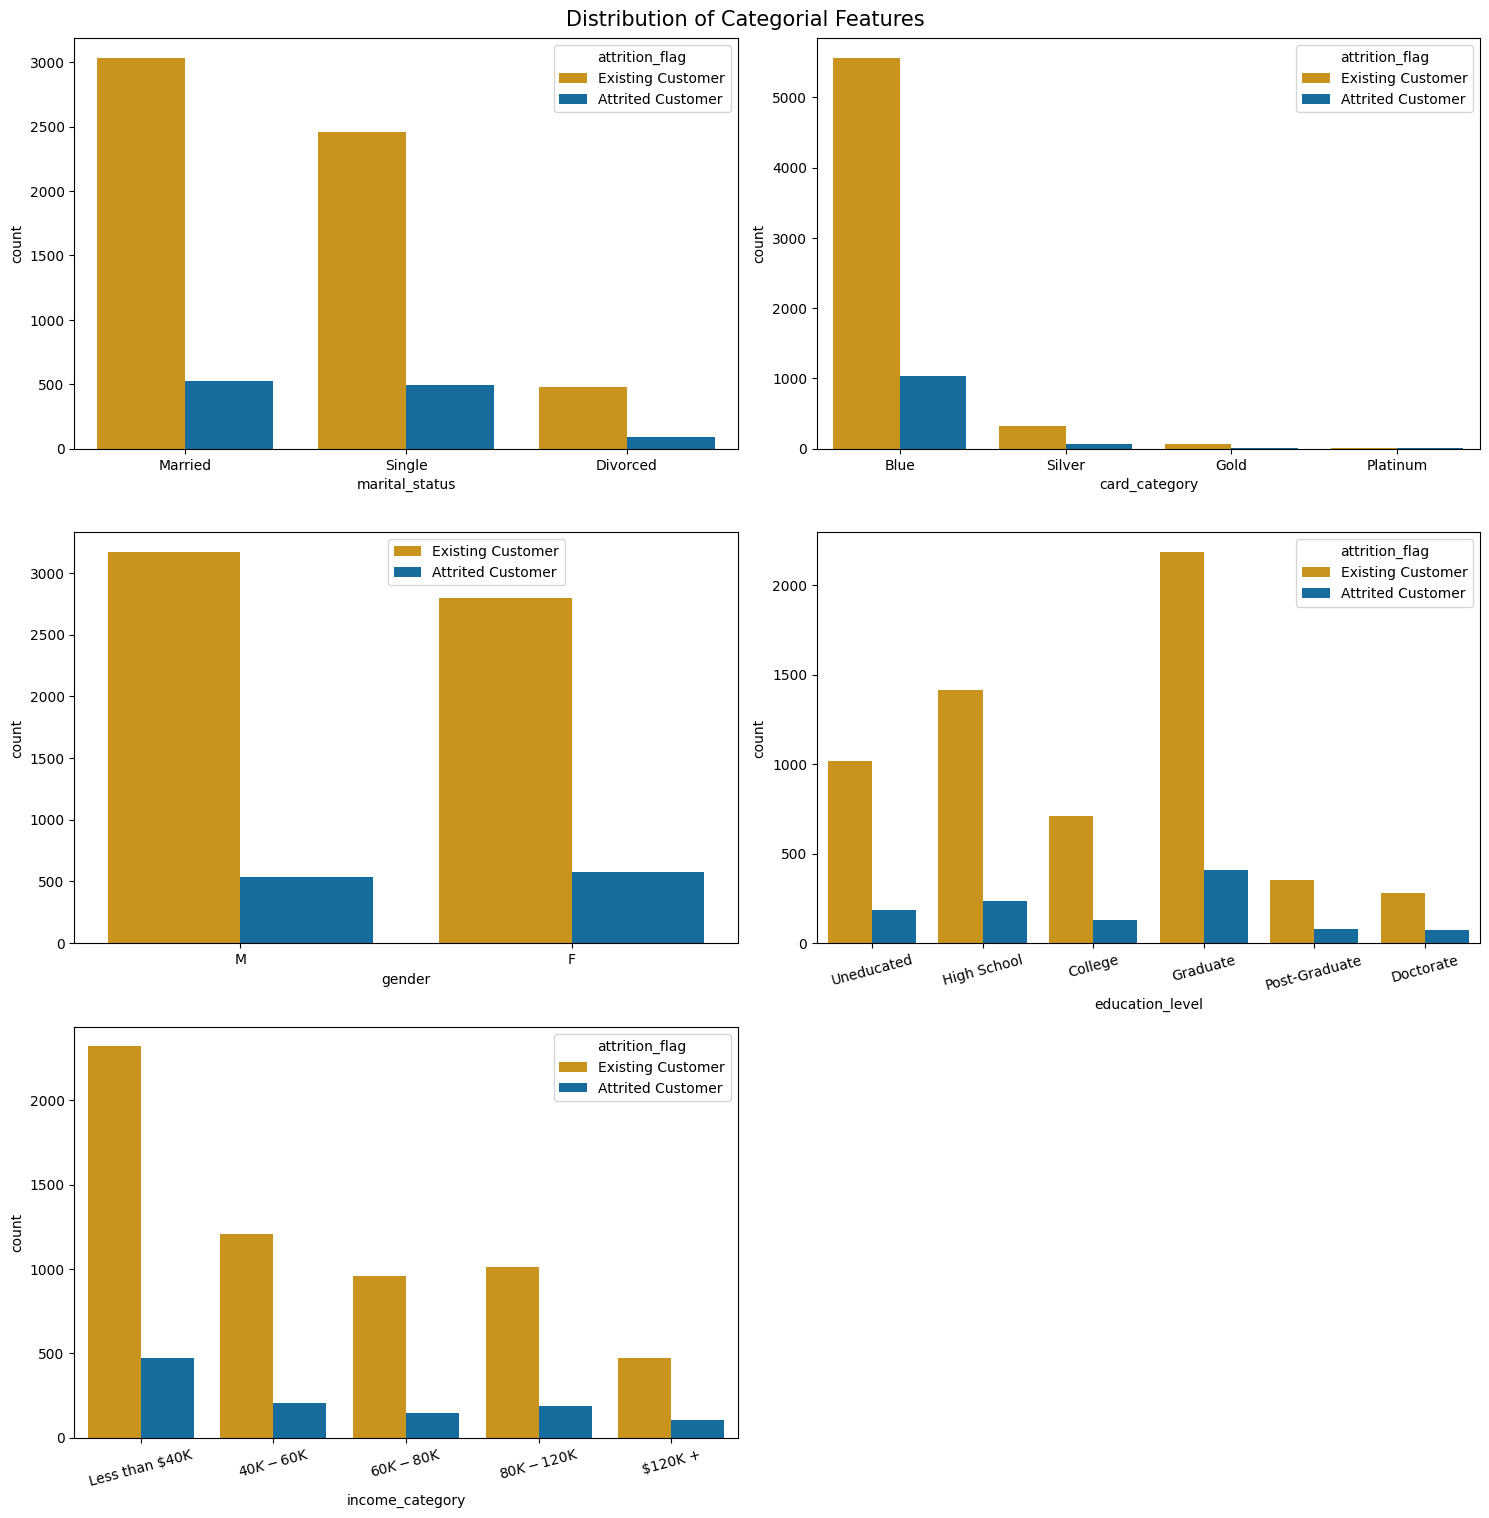

In [59]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
sb.countplot(x=df_clean.marital_status,
              hue=df_clean.attrition_flag,
              palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'},
              color=base_color)
plt.subplot(3, 2, 2)
sb.countplot(x=df_clean.card_category,
              hue=df_clean.attrition_flag,
              palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'},
               color=base_color)
plt.subplot(3, 2, 3)
sb.countplot(x=df_clean.gender, hue=df_clean.attrition_flag, palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'}, color=base_color,)
plt.legend(bbox_to_anchor=(.75, 1))
plt.subplot(3, 2, 4)
sb.countplot(x=df_clean.education_level,
              hue=df_clean.attrition_flag,
              palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'},
              color=base_color)
plt.xticks(rotation=15)
plt.subplot(3, 2, 5)
sb.countplot(x=df_clean.income_category,
              hue=df_clean.attrition_flag,
              palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'},
              color=base_color)
plt.xticks(rotation=15)
plt.tight_layout()
plt.suptitle(f'Distribution of Categorial Features\n', va='bottom',fontsize=15)
plt.show();

#### `Observations`
- Being married or single has little impact on them churning, while for the divorced it is lower.
- Most of the clients hold blue cards
- Gender has almost no influence on churn
- Most of the clients of the bank are graduate, and it seems churn rate is very similar given the proportion of each class.
- Most of the clients have income less than 40K.

## Raising Data Questions

#### `Question` 
- Is the churn varies across different levels of Card Utilization Ratio?
#### `Visualization`

In [60]:
def plot_num(var):
    
    plt.figure(figsize=(10, 5))
    # define the color dictionary to reverse the colors of attrition_flag
    color_dict = {'Attrited Customer': '#0072B2', 'Existing Customer': '#E69F00'}
    
    plt.subplot(1,2,1)
    sb.histplot(data=df_clean,x=var,hue='attrition_flag',kde=True, palette=color_dict);
    
    plt.subplot(1,2,2)
    sb.boxplot(x='attrition_flag',y=var,data=df_clean,palette=color_dict);
    
    plt.subplots_adjust(wspace=0.3)

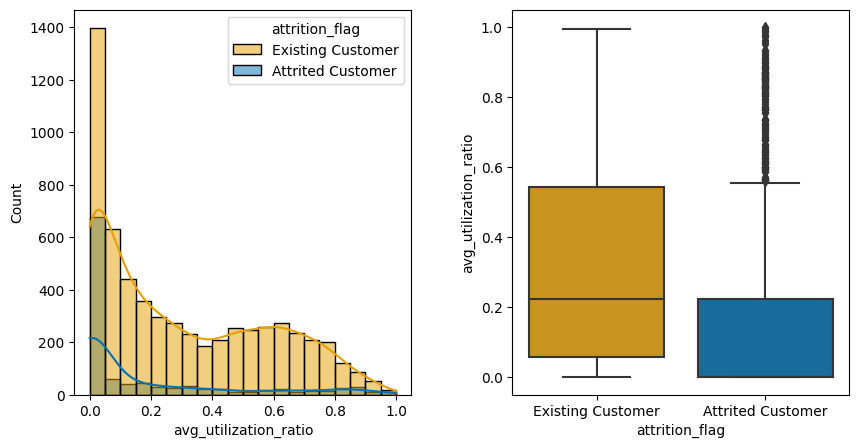

In [61]:
plot_num(df_clean.avg_utilization_ratio);

#### `Question` 
- Is the churn varies across different levels of Credit Limit?
#### `Visualization`

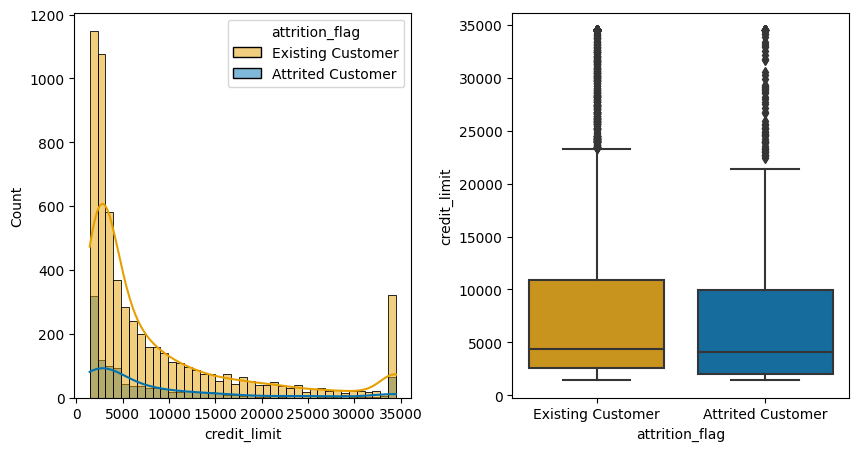

In [62]:
plot_num(df_clean.credit_limit);

#### `Question` 
- Is the churn varies across different levels of Months on book?
#### `Visualization`

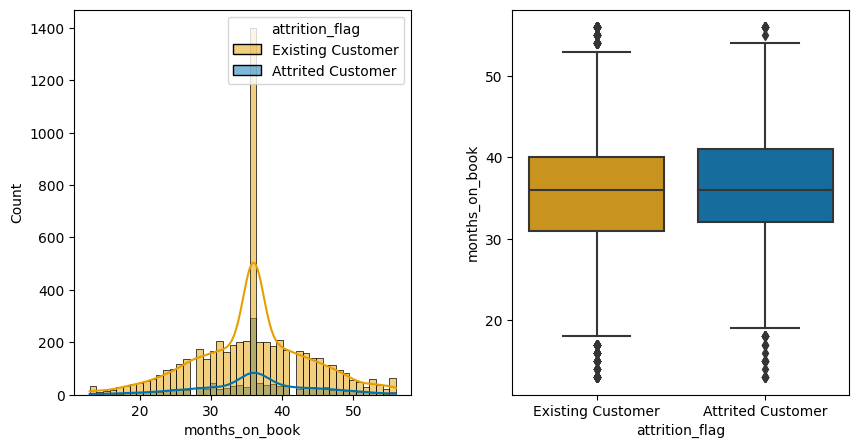

In [63]:
plot_num(df_clean.months_on_book);

#### `Question` 
- Is the churn varies across different levels of Total Revolving Balance?
#### `Visualization`

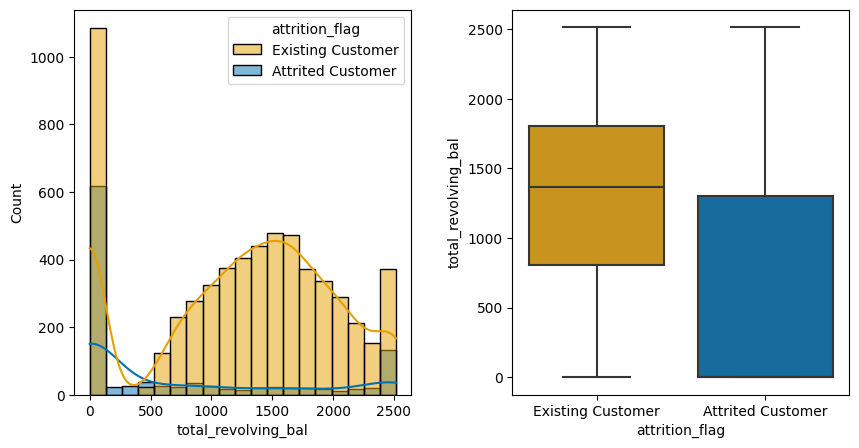

In [64]:
plot_num(df_clean.total_revolving_bal);

#### `Question` 
- Is the churn varies across different levels of Total Transaction Amount?
#### `Visualization`

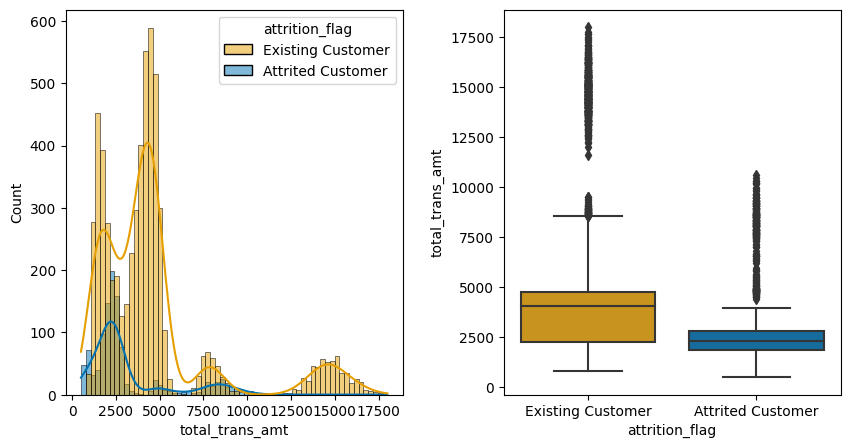

In [65]:
plot_num(df_clean.total_trans_amt);

#### `Question` 
- Is the churn varies across different levels of  Open to Buy Credit Line?
#### `Visualization`

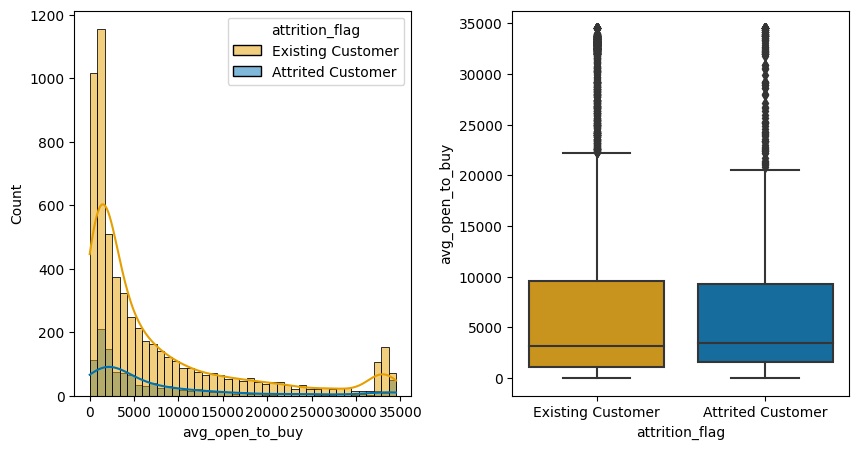

In [66]:
plot_num(df_clean.avg_open_to_buy);

#### `Question` 
- Is the churn varies across different levels of Total Transaction Count?
#### `Visualization`

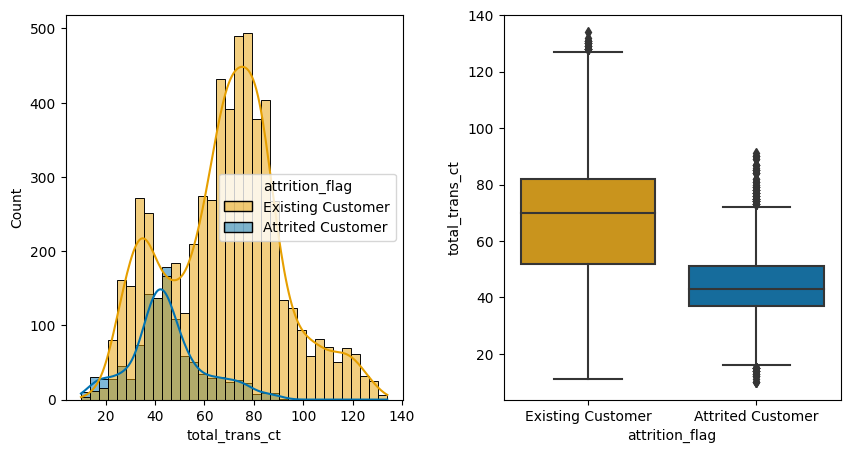

In [67]:
plot_num(df_clean.total_trans_ct);

#### `Question` 
- Is the churn varies across different age groups?
#### `Visualization`

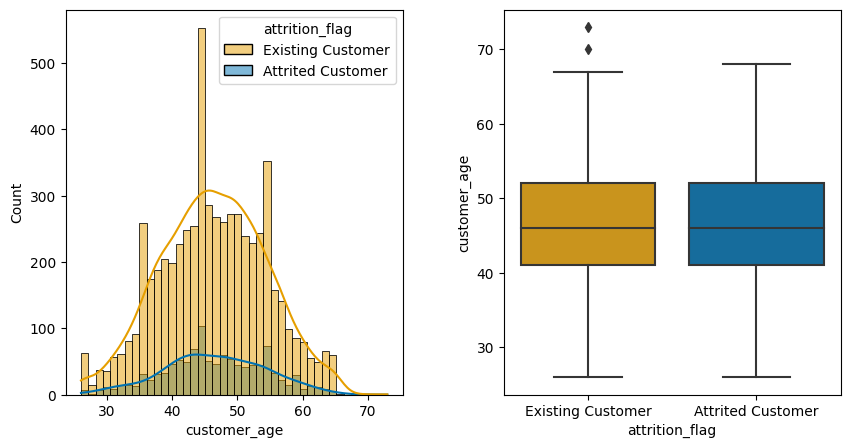

In [68]:
plot_num(df_clean.customer_age);

#### `Observations`
- In case of total_trans_ct, total_trans_amt, total_tevolving_bal, and avg_utilization_ratio seems to have effect on determining whether a customer leave service or not.
- While in case of age and month_on_book - there is no specific pattern identified. Every client age group and period of relationship is similarly likely to churn.

#### `Question` 
- What is the behavior of Churn Rate across Credit Limit & Avg Utilization Ratio?
#### `Visualization`

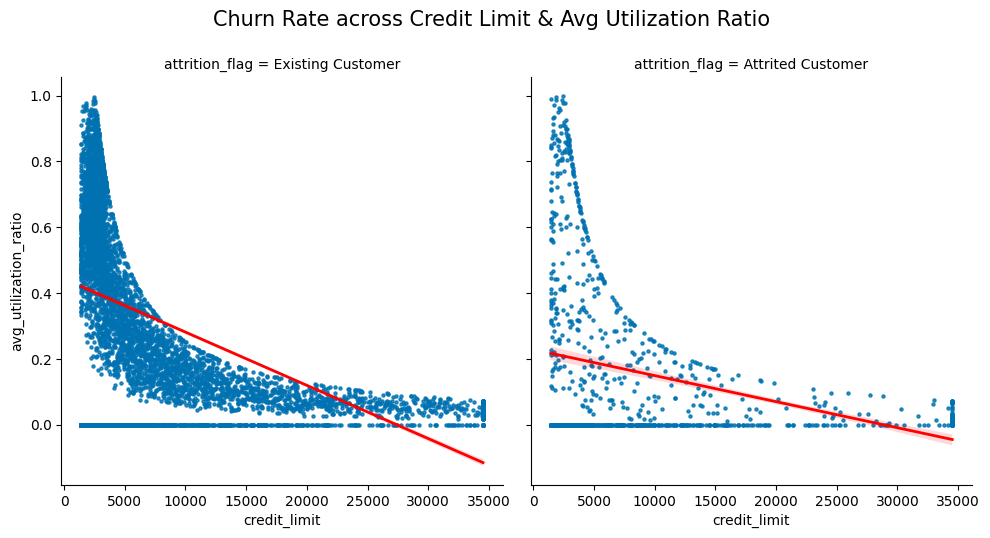

In [69]:
sb.lmplot(x='credit_limit',
           y='avg_utilization_ratio',
           data=df_clean,
           col='attrition_flag',
           palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'},
           scatter_kws={
               "s": 5,
               "color": '#0072B2'
           },
           line_kws={
               'lw': 2,
               'color': 'red'
           })
plt.suptitle('Churn Rate across Credit Limit & Avg Utilization Ratio \n',
             va='bottom',
             fontsize=15)
plt.show()

#### `Observations`
- Clients with a lower credit limit utilization ratio are more likely to churn. They have a less steep regression line. Also, Clients with a lower credit limit with high utilization have more risk of churning.

#### `Question` 
- What is the behavior of Churn Rate across Credit Limit & No. of months inactive in the last 12 months?
#### `Visualization`

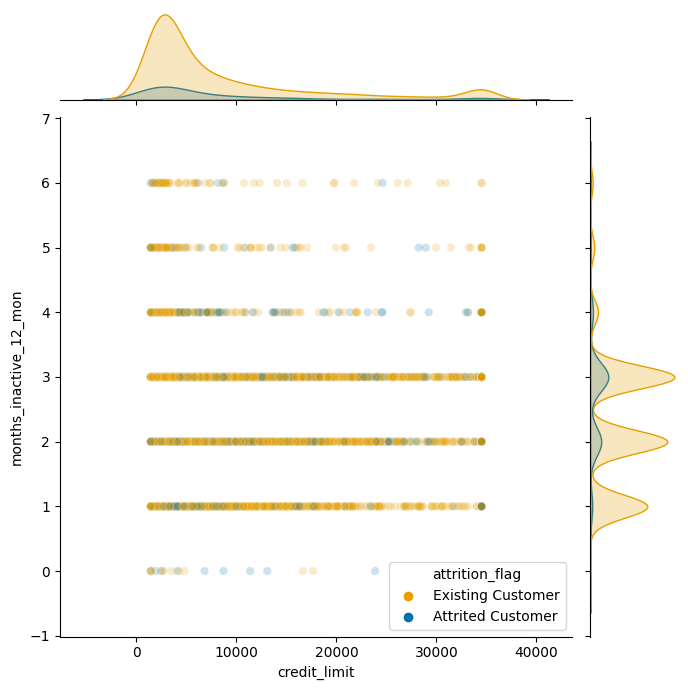

In [70]:
g = sb.jointplot(data=df_clean,
              x='credit_limit',
              y='months_inactive_12_mon',
              hue='attrition_flag',
              palette={'Existing Customer': '#E69F00', 'Attrited Customer': '#0072B2'},
              alpha = 0.2,
              height=7)

#### `Observations`
- Clients inactive for 3 to 4 month has a higher risk of churning.

#### `Question` 
- How does the number of contacts and products influence the churn rate?
#### `Visualization`

In [71]:
def plot_cat(var):
    
    plt.figure(figsize=(10, 5))
    
    inter=df_clean.groupby(var)['churn'].mean()
    order=inter.index
    
    plt.subplot(1,2,1)
    sb.countplot(x=var,data=df_clean,order=order);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct="%0.1f%%",radius=1.2);
    
    plt.tight_layout()
    
    plt.subplots_adjust(wspace=0.3)

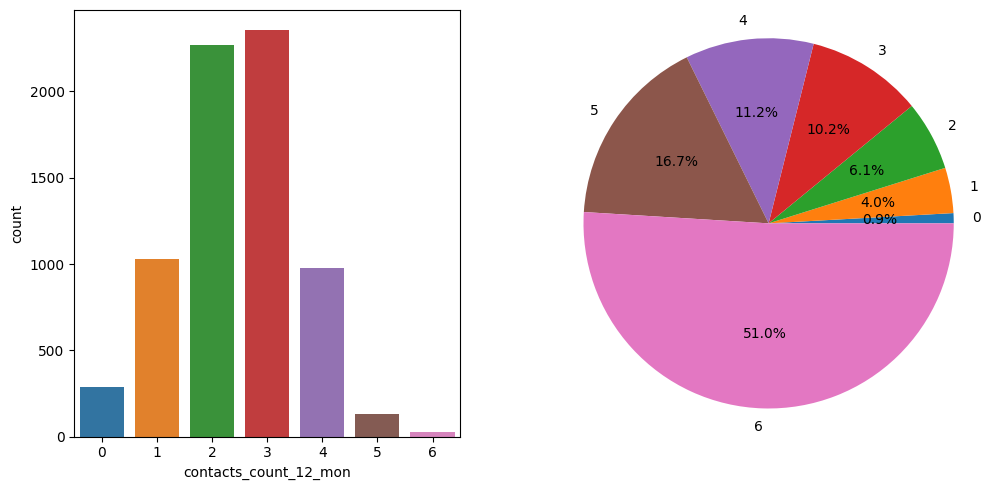

In [72]:
plot_cat(df_clean.contacts_count_12_mon);

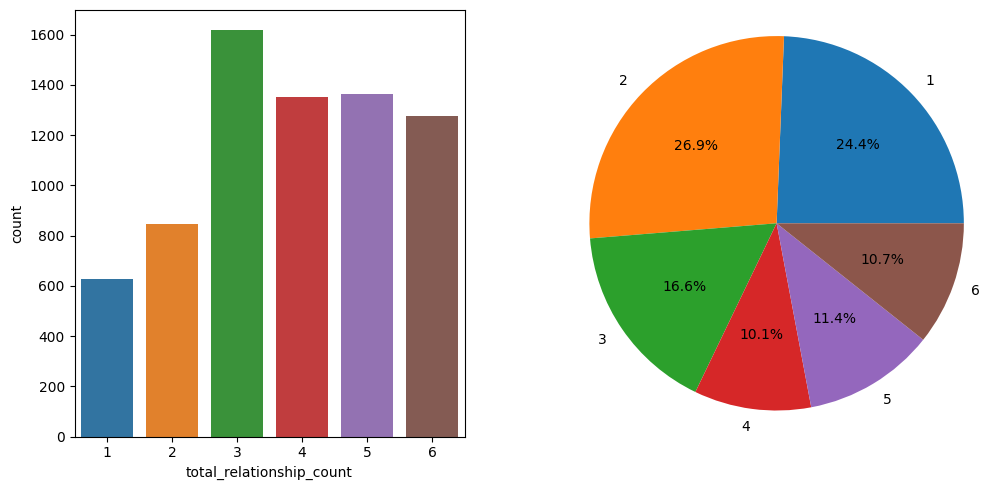

In [73]:
plot_cat(df_clean.total_relationship_count);

#### `Observations`
- As the number of customer interactions increases, the churn rate increases.
- Customers with 1 or 2 products are more likely to leave than those with more products.

## Data Enrichment
> The existing database lacks time variables, so I would try to get additional information from the bank about the year, month, day, and time of each transaction. It would allow observing the dynamics of variables over time.

> It is also very important to understand why customers leave the bank, so I would try to get information about the reasons for abandoning services by conducting a survey among customers. Analyzing that information, it would be possible to present practical recommendations for improving the quality of services.

> I would also try to get information about the features (service costs, interest rates, APR rates etc.) associated with each type of card. The analysis of that information would allow the development of new loyalty programs, attract new customers and reduce churn.